In [3]:
from thllib import flylib as flb
from matplotlib import pyplot as plt
import numpy as np
import scipy
from thllib import util
import figurefirst as fifi
from scipy import signal

In [4]:
%matplotlib inline

In [137]:
fly = flb.NetFly(1530,rootpath='/media/imager/FlyDataD/FlyDB/')
fly.open_signals()

In [187]:
abf_sp = fly.abf_times[1] #abf spike period
ca_frame_in_abf = np.int(0.02/abf_sp) #abf period in abf idxs

#get the idx's where the ca data is aquired
ep_idx = np.where(np.array(fly.abf_led_pulse)>1.0)[0]

#get the idx's where the ca data is aquired
ep_idx = np.where(np.array(fly.abf_led_pulse)>1.0)[0]
start = ep_idx[0]+np.int(1.5*ca_frame_in_abf) #the calcium data starts at the end of one trigger period 
stop = ep_idx[-1]+np.int(1.5*ca_frame_in_abf)

#make a time array for the recording epoch
ep_times = np.array(fly.abf_times[start:stop])
ep_times -= ep_times[0]

#load this into memory since I will use it quite a bit
spike_sig = np.array(fly.abf_electrode[start:stop])
i1_ca = fly.ca_camera_left_model_fits['i1']
## another way of extracting b1 activity
#F_ = np.mean(fly.ca_camera_left[:,24:34,75:100],axis = (1,2))
#F = np.percentile(F_,0.01)
#DF_F = (F_-F)/F
#b1_ca = DF_F

In [188]:
#put the ca data into the abf timebase
resampled_i1_ca,resampled_t = signal.resample(i1_ca,len(ep_times),
                                              np.array(fly.ca_camera_left_times))

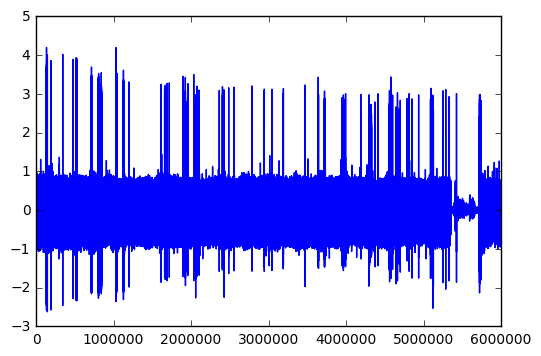

In [189]:
plt.plot(spike_sig*-1)
spike_sig = spike_sig*-1

In [190]:
#grab a spike pool
spike_idxs = util.idx_by_thresh(spike_sig,thresh = 2.5)
#filter out false positives here
#get_peaks
peak_idxs = [np.argmax(spike_sig[idx[0]-10:idx[-1]+10])+idx[0]-10 for idx in spike_idxs]

spike_idxs = spike_idxs[:-1]
peak_idxs = peak_idxs[:-1]

In [191]:
#from thllib import spike_sorters as spks

#wv_mtrx = np.array([spike_sig[idx-50:idx+50] for idx in peak_idxs])
time_mtrx = np.array([ep_times[idx-50:idx+50] for idx in peak_idxs])

#lns = plt.plot(wv_mtrx[::10].T)

#pool = spks.SpikePool(wv_mtrx,time_mtrx)

#p2p = spks.P2PTransform(pool,np.ones(len(pool.wv_mtrx)))

#p2p.transform()

#bns = plt.hist(p2p.trnsmtrx[:,1],bins = np.linspace(-100,100,100))

#msk = (p2p.trnsmtrx[:,1]>0)
#msk = (p2p.trnsmtrx[:,1]<20) & (p2p.trnsmtrx[:,1]>0)

#plt.subplot(1,2,1)
#plt.plot(pool.wv_mtrx[msk][::5,:].T,color = 'k', alpha = 0.2)
#plt.subplot(1,2,2)
#lns = plt.plot(pool.wv_mtrx[~msk][::5,:].T,color = 'k', alpha = 0.2)

#med_trans = spks.MedTrans(pool,msk,params = {'trans_dims':1})

#med_trans.transform()

#lns = plt.hist(med_trans.trnsmtrx[:,0],bins = 100)
#plt.gca().set_ybound(0,300)

#msk2 = med_trans.trnsmtrx[:,0]<60.

#plt.subplot(2,1,1)
#lns = plt.plot(pool.wv_mtrx[~(msk & msk2)][:,:].T,color = 'k', alpha = 0.1)
#plt.subplot(2,1,2)
#lns = plt.plot(pool.wv_mtrx[(msk & msk2)][:,:].T,color = 'r', alpha = 0.1)

#lns = plt.plot(np.array([spike_sig[idx-50:idx+50] for idx in peak_idxs[::10]]).T,color = 'k',alpha = 0.2)

#spike_idxs = np.array(spike_idxs)[msk & msk2]
#peak_idxs = np.array(peak_idxs)[msk & msk2]

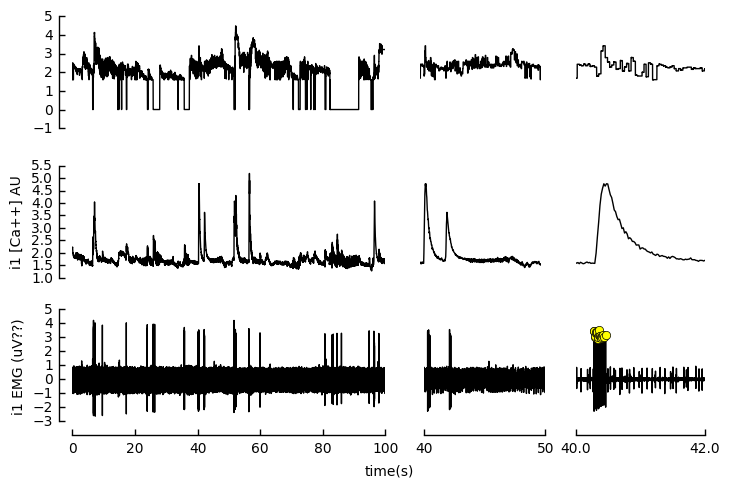

In [227]:
#inspect the data at a several time-scales
layout = fifi.FigureLayout('inspection_layout_2.svg',make_mplfigures = True)

#layout.axes['ax0'].plot(ep_times,
#                        fly.ca_camera_left_model_fits['i1'],color = 'k')
layout.axes['ax0'].plot(ep_times[::100],
                        fly.abf_kinefly_left[start:stop][::100],color = 'k')
layout.axes['ax0'].set_xbound(0,100)

layout.axes['ax1'].plot(fly.ca_camera_left_times,
                        fly.ca_camera_left_model_fits['i1'],color = 'k')

layout.axes['ax1'].set_xbound(0,100)
layout.axes['ax1'].set_ylabel('i1 [Ca++] AU')
layout.axes['ax2'].plot(ep_times,spike_sig,color = 'k')
layout.axes['ax2'].set_xbound(0,100)
#layout.axes['ax2'].set_ylabel('b1 EMG (%s)'%fly.abf_electrode_units[0])
layout.axes['ax2'].set_ylabel('i1 EMG (%s)'%'uV??')
#WE SHOULD FIGURE OUT WHAT THE UNITS ARE AND ADD IT TO THE AXON PROTOCOL


layout.axes['ax0_inset'].plot(ep_times[::100],
                        fly.abf_kinefly_left[start:stop][::100],color = 'k')
layout.axes['ax0_inset'].set_xbound(40,50)
layout.axes['ax1_inset'].plot(fly.ca_camera_left_times,
                              fly.ca_camera_left_model_fits['i1'],color = 'k')
layout.axes['ax1_inset'].set_xbound(40,50)
layout.axes['ax1_inset'].set_xticks([40,50])

layout.axes['ax2_inset'].plot(ep_times,
                              spike_sig,color = 'k')
layout.axes['ax2_inset'].set_xbound(40,50)
layout.axes['ax2_inset'].set_xticks([40,50])

layout.axes['ax0_inset2'].plot(ep_times,
                        fly.abf_kinefly_left[start:stop],color = 'k')
layout.axes['ax0_inset2'].set_xbound(40,42.0)
layout.axes['ax1_inset2'].plot(fly.ca_camera_left_times,
                               fly.ca_camera_left_model_fits['i1'],color = 'k')
layout.axes['ax1_inset2'].set_xbound(40,42.0)

layout.axes['ax2_inset2'].plot(ep_times,spike_sig,color = 'k')
layout.axes['ax2_inset2'].plot(ep_times[peak_idxs],
                               spike_sig[peak_idxs],'o',color = 'yellow')

layout.axes['ax2_inset2'].set_xbound(40.0,42.0)
layout.axes['ax2_inset2'].set_xticks([40.0,42.0])
layout.axes['ax2_inset2'].set_xticklabels(['40.0','42.0'])

layout.axes['time_label'].set_xlabel('time(s)')
layout.axes['time_label'].set_zorder(-10)
fifi.mpl_functions.set_spines(layout)
layout.save('spikes_vs_ca.svg')

In [198]:
#create an impulse train to represent the spikes
impulses = np.zeros_like(spike_sig)
impulses[peak_idxs] = 1

In [203]:
kernel = np.real(np.fft.ifft(np.fft.fft(resampled_i1_ca)/np.fft.fft(impulses)))

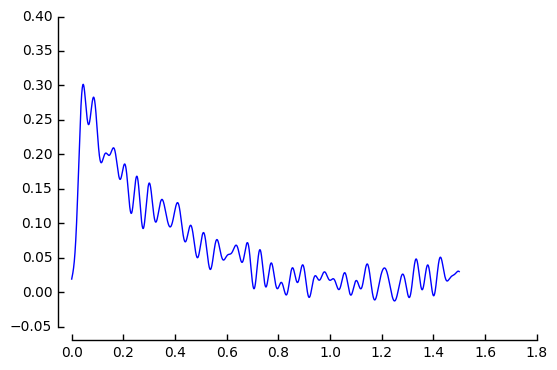

In [204]:
plt.plot(ep_times[:30000],kernel[:30000],clip_on = False)
#plt.gca().set_xbound(0,6)
#plt.gca().set_ybound(0,1)
fifi.mpl_functions.adjust_spines(plt.gca(),['left','bottom'])

In [205]:
def make_single_kernel(times,tauon1,tauoff1):
    kx = np.copy(times)
    kon1 = lambda x:np.exp(((-1*tauon1)/(x)))
    koff1 = lambda x:np.exp((-1*x)/tauoff1)
    k1 = (kon1(kx)*koff1(kx))
    return k1/np.max(k1)

def make_double_kernel(times,tauon1,tauon2,tauoff1,tauoff2):
    kx = np.copy(times)
    kon1 = lambda x:np.exp(((-1*tauon1)/(x)))
    kon2 = lambda x:np.exp(((-1*tauon2)/(x)))
    koff1 = lambda x:np.exp((-1*x)/tauoff1)
    koff2 = lambda x:np.exp((-1*x)/tauoff2)
    k1 = (kon1(kx)*koff1(kx))
    k2 = (kon2(kx)*koff2(kx))
    return (k1+k2)/np.max(k1+k2)

/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in divide
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in divide


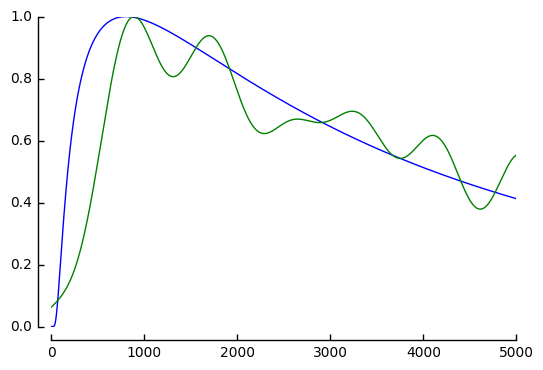

In [206]:
sp = 20. #sample period ms
MK_TON1 = 10/1000. #ms
MK_TON2 = 10/1000. #ms
MK_TOFF1 = 100/1000. #ms
MK_TOFF2 = 300/1000.
plt.plot(make_double_kernel(ep_times[:5000],MK_TON1,MK_TON2,MK_TOFF1,MK_TOFF2))
#plt.plot(make_kernel(ep_times[:60000],MK_TON1,MK_TOFF1))
plt.plot(kernel[:5000]/np.max(kernel[:5000]))
fifi.mpl_functions.adjust_spines(plt.gca(),['left','bottom'])

In [207]:
#just fit to the first segment of the curve
short_kernel = kernel[:60000]/np.max(kernel[:60000])
from scipy.optimize import curve_fit
popt1,pcov1 = curve_fit(make_single_kernel,
                      ep_times[:60000],
                      short_kernel,
                      [MK_TON1,MK_TOFF1])

popt2,pcov2 = curve_fit(make_double_kernel,
                      ep_times[:60000],
                      short_kernel,
                      [MK_TON1,MK_TON2,MK_TOFF1,MK_TOFF2])

/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in divide
  app.launch_new_instance()
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in divide
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in divide
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in divide


In [210]:
fit_kernel_single = make_single_kernel(ep_times,*popt1) 
fit_kernel_double = make_double_kernel(ep_times,*popt2) 

/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in divide
  app.launch_new_instance()
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in divide
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in divide


In [211]:
#a negative TAU2 cant be correct, but ~300ms for
#gcamp looks good. Perhaps TAU2 should be constrained to a 
#positive number or dropped from the fit.
print popt1
print popt2

[ 0.01636028  0.23604393]
[ 0.02378957  0.02100743  0.06061984  0.30985862]


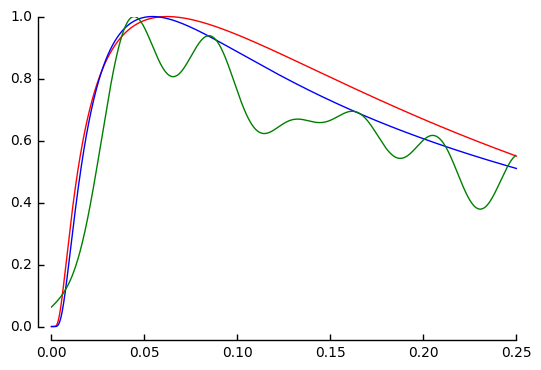

In [212]:
plt.plot(ep_times[:5000],fit_kernel_single[:5000],color = 'red',clip_on = False)
plt.plot(ep_times[:5000],fit_kernel_double[:5000],color = 'blue',clip_on = False)
plt.plot(ep_times[:5000],short_kernel[:5000]/np.max(short_kernel),color = 'green')
fifi.mpl_functions.adjust_spines(plt.gca(),['left','bottom'])

In [ ]:
snum = 4
l = fly.block_data['left', 'amp', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]
r = fly.block_data['right', 'amp', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]
x = fly.block_data['common', 'x_pos', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]

idxs = fly.block_data['common','idx', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]
times = np.arange(len(x))*0.02
sig = fly.ca_cam_left_model_fits['iii3'][idxs[]